In [1]:
#import required classes and packages
from keras.applications import MobileNet
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from tensorflow.keras.applications import MobileNet, VGG16, VGG19, ResNet50, InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras import Model, Input
from sklearn.linear_model import LogisticRegression  # LRA
from sklearn.svm import SVC                         # SVM
from sklearn.tree import DecisionTreeClassifier     # DT
from sklearn.ensemble import RandomForestClassifier # RF
from sklearn.neural_network import MLPClassifier    # MLP
from sklearn.naive_bayes import GaussianNB          # AVM (assumed to be Naive Bayes)
import seaborn as sns
import matplotlib.pyplot as plt   
import os
import cv2
import cv2
import numpy as np
from keras.utils.np_utils import to_categorical
from keras.layers import  MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten, AveragePooling2D
from keras.layers import Convolution2D
from keras.models import Sequential, load_model, Model
import pickle
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint
import warnings
warnings.filterwarnings('ignore')

In [2]:
#define and load class labels found in dataset
import os
path = "Dataset"
labels = []
X = []
Y = []
for root, dirs, directory in os.walk(path):
    for j in range(len(directory)):
        name = os.path.basename(root)
        if name not in labels:
            labels.append(name.strip())   
print("Plant Disease Class Labels : "+str(labels))

Plant Disease Class Labels : ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___healthy', 'Strawberry___Leaf_scorch', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mi

In [3]:
#define function to get class label of given image
def getLabel(name):
    index = -1
    for i in range(len(labels)):
        if labels[i] == name:
            index = i
            break
    return index

In [4]:
from tensorflow.keras import Model
import numpy as np
from tensorflow.keras.applications import MobileNet, VGG16, ResNet50, InceptionV3, VGG19
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Input

def build_model(base_model):
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(38, activation='softmax')(x)  # Replace 38 with actual number of classes
    return Model(inputs=base_model.input, outputs=x)

models = {
    "MobileNet": build_model(MobileNet(input_shape=(224, 224, 3), include_top=False, weights='imagenet')),
    "VGG16": build_model(VGG16(input_shape=(224, 224, 3), include_top=False, weights='imagenet')),
    "ResNet50": build_model(ResNet50(input_shape=(224, 224, 3), include_top=False, weights='imagenet')),
    "InceptionV3": build_model(InceptionV3(input_shape=(224, 224, 3), include_top=False, weights='imagenet'))
}


In [5]:
#load dataset image and process them
import numpy as np
if os.path.exists("model/X.txt.npy"):
    X = np.load('model/X.txt.npy')
    Y = np.load('model/Y.txt.npy')
else: #if images not process then read and process image pixels
    for root, dirs, directory in os.walk(path):#connect to dataset folder
        for j in range(len(directory)):#loop all images from dataset folder
            name = os.path.basename(root)
            if 'Thumbs.db' not in directory[j]:
                img = cv2.imread(root+"/"+directory[j])#read images
                img = cv2.resize(img, (32, 32))#resize image
                X.append(img) #add image pixels to X array
                label = getLabel(name)#get image label id
                Y.append(label)#add image label                
    X = np.asarray(X)#convert array as numpy array
    Y = np.asarray(Y)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)#shuffle images
    X = X[indices]
    Y = Y[indices]
    np.save('model/X.txt',X)#save process images and labels
    np.save('model/Y.txt',Y)
print("Dataset images loaded")
print("Total images found in dataset : "+str(X.shape[0]))
print()

Dataset images loaded
Total images found in dataset : 43444



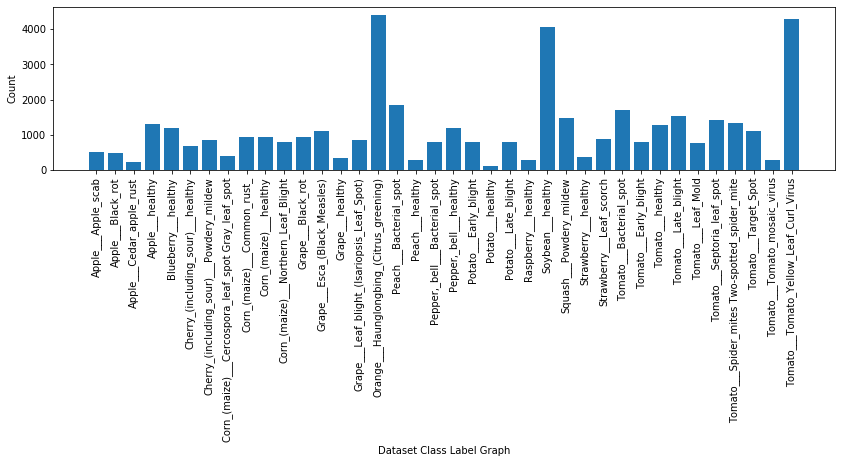

In [6]:
#visualizing class labels count found in dataset
import matplotlib.pyplot as plt
import numpy as np
names, count = np.unique(Y, return_counts = True)
height = count
bars = labels
y_pos = np.arange(len(bars))
plt.figure(figsize = (14, 3)) 
plt.bar(y_pos, height)
plt.xticks(y_pos, bars)
plt.xlabel("Dataset Class Label Graph")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

In [7]:
#dataset preprocessing such as shuffling and normalizing pixel values
from tensorflow.keras.utils import to_categorical
X = X.astype('float32')
X = X/255
indices = np.arange(X.shape[0])
np.random.shuffle(indices)
X = X[indices]
Y = Y[indices]
Y = to_categorical(Y)
print("Dataset processing completed")

Dataset processing completed


In [8]:
#split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2) #split dataset into train and test
print("80% Dataset Size used to train algorithm = "+str(X_train.shape[0]))
print("20% Dataset Size used to train algorithm  = "+str(X_test.shape[0]))

80% Dataset Size used to train algorithm = 34755
20% Dataset Size used to train algorithm  = 8689


In [9]:
#define global variables to save accuracy and other metrics
accuracy = []
precision = []
recall = []
fscore = []

In [10]:
def calculateMetrics(algorithm, predict, y_test):
    a = accuracy_score(y_test,predict)*100
    p = precision_score(y_test, predict,average='macro') * 100
    r = recall_score(y_test, predict,average='macro') * 100
    f = f1_score(y_test, predict,average='macro') * 100
    accuracy.append(a)
    precision.append(p)
    recall.append(r)
    fscore.append(f)
    print(algorithm+" Accuracy  :  "+str(a))
    print(algorithm+" Precision : "+str(p))
    print(algorithm+" Recall    : "+str(r))
    print(algorithm+" FScore    : "+str(f))    
    conf_matrix = confusion_matrix(y_test, predict) 
    plt.figure(figsize =(14, 8)) 
    ax = sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, cmap="viridis" ,fmt ="g");
    ax.set_ylim([0,len(labels)])
    plt.title(algorithm+" Confusion matrix") 
    plt.xticks(rotation=90)
    plt.ylabel('True class') 
    plt.xlabel('Predicted class') 
    plt.show()  

272/272 [==============================] - 2s 5ms/step
CNN Model Accuracy  :  84.63574634595466
CNN Model Precision : 83.36450072273549
CNN Model Recall    : 78.41186813591744
CNN Model FScore    : 79.3842830193073


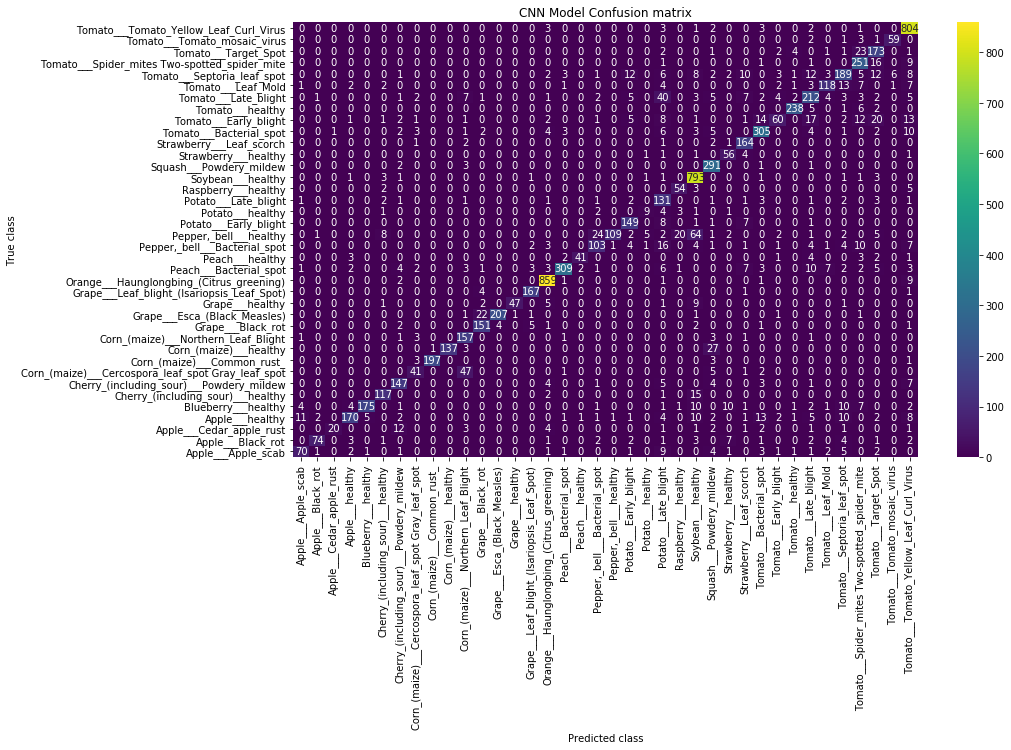

In [11]:

# Defining CNN Model
cnn_model = Sequential()

# First CNN Layer with 32 filters of size (3x3) for feature extraction
cnn_model.add(Convolution2D(32, (3 , 3), input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3]), activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))  # Max Pooling to reduce spatial dimensions

# Second CNN Layer for further feature refinement
cnn_model.add(Convolution2D(32, (3, 3), activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening the feature maps into a 1D vector
cnn_model.add(Flatten())

# Fully Connected Dense Layer
cnn_model.add(Dense(units = 256, activation = 'relu'))

# Output Layer with Softmax Activation
cnn_model.add(Dense(units = y_train.shape[1], activation = 'softmax'))

# Compiling the Model
cnn_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Training and Loading the Model
if os.path.exists("model/cnn_weights.hdf5") == False:
    model_check_point = ModelCheckpoint(filepath='model/cnn_weights.hdf5', verbose = 1, save_best_only = True)
    hist = cnn_model.fit(X_train, y_train, batch_size = 64, epochs =20, validation_data=(X_test, y_test), callbacks=[model_check_point], verbose=1)
    
    # Saving the training history
    with open('model/cnn_history.pckl', 'wb') as f:
        pickle.dump(hist.history, f)
else:
    cnn_model.load_weights("model/cnn_weights.hdf5")

# Performing prediction on test data
predict = cnn_model.predict(X_test)
predict = np.argmax(predict, axis=1)
y_test1 = np.argmax(y_test, axis=1)

# Function to calculate accuracy and other metrics
calculateMetrics("CNN Model", predict, y_test1)


272/272 [==============================] - 1s 5ms/step
MobileNet CNN Accuracy  :  97.15732535389573
MobileNet CNN Precision : 96.3801386255344
MobileNet CNN Recall    : 96.62957883042597
MobileNet CNN FScore    : 96.41405829402557


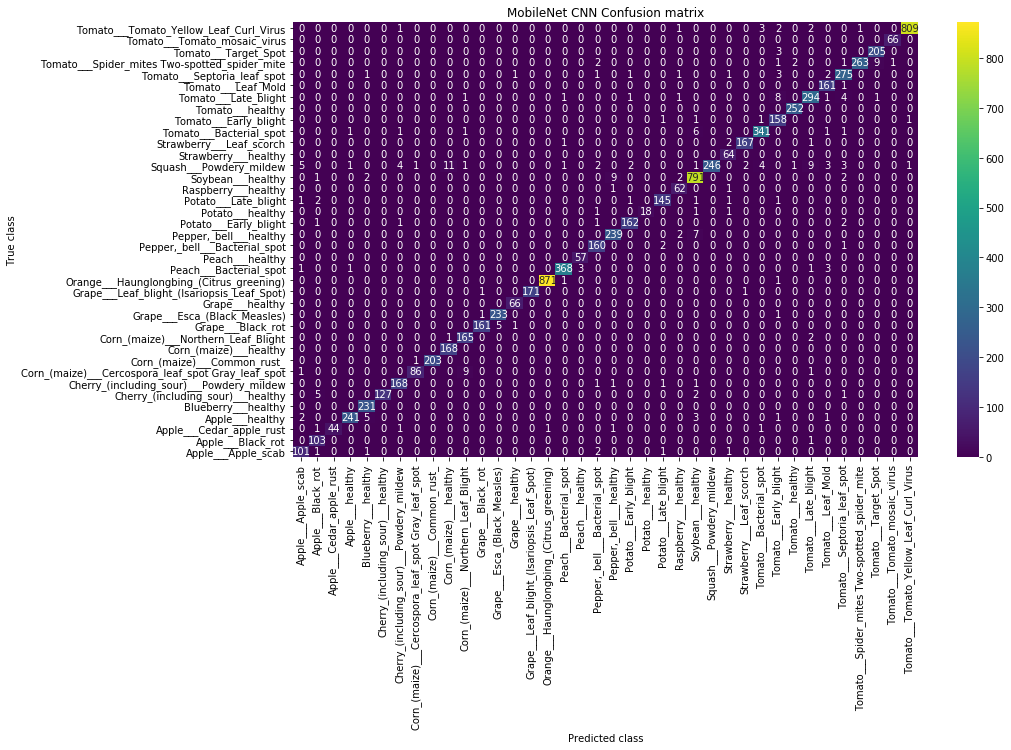

In [12]:
#defining and loading mobile net object
mobilenet_model = MobileNet(input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3]), include_top=False, weights='imagenet')
for layer in mobilenet_model.layers:
    layer.trainable = False
#adding new cnn layer as transfer learning for mobilenet to predict plant disease
mobilenet_model = Sequential()
#creating CNN layer of size 32 neurons each having 3 X 3 matrix for features filtration or optimization
mobilenet_model.add(Convolution2D(32, (3 , 3), input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3]), activation = 'relu'))
#max layer to collect relevant features from CNN layer
mobilenet_model.add(MaxPooling2D(pool_size = (2, 2)))
#creating another CNN layer for further features optimization
mobilenet_model.add(Convolution2D(32, (3, 3), activation = 'relu'))
mobilenet_model.add(MaxPooling2D(pool_size = (2, 2)))
mobilenet_model.add(Flatten())
#defining dense prediction layer
mobilenet_model.add(Dense(units = 256, activation = 'relu'))
mobilenet_model.add(Dense(units = y_train.shape[1], activation = 'softmax'))
#compiling, training and loading model

mobilenet_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
if os.path.exists("model/mobilenet_weights.hdf5") == False:
    model_check_point = ModelCheckpoint(filepath='model/mobilenet_weights.hdf5', verbose = 1, save_best_only = True)
    hist = mobilenet_model.fit(X_train, y_train, batch_size = 64, epochs = 20, validation_data=(X_test, y_test), callbacks=[model_check_point], verbose=1)
    f = open('model/mobilenet_history.pckl', 'wb')
    pickle.dump(hist.history, f)
    f.close()    
else:
    mobilenet_model.load_weights("model/mobilenet_weights.hdf5")
#perform predictionn on test data
predict = mobilenet_model.predict(X_test)
predict = np.argmax(predict, axis=1)
y_test1 = np.argmax(y_test, axis=1)
#call this function to calculate accuracy
calculateMetrics("MobileNet CNN", predict, y_test1)

In [13]:
from tensorflow.keras import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Input, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.applications import MobileNet, VGG16, ResNet50, InceptionV3, VGG19
from tensorflow.keras.models import Sequential
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Custom model builder for pretrained models
def build_model(base_model):
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(10, activation='softmax')(x)  # replace 10 with number of classes if needed
    return Model(inputs=base_model.input, outputs=x)

# Custom CNN model
def build_simple_cnn(input_shape=(75, 75, 3), num_classes=10):
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
        MaxPooling2D(2,2),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(2,2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Models dictionary
models = {
    "MobileNet": build_model(MobileNet(input_shape=(75, 75, 3), include_top=False, weights='imagenet')),
    "VGG16": build_model(VGG16(input_shape=(75, 75, 3), include_top=False, weights='imagenet')),
    "ResNet50": build_model(ResNet50(input_shape=(75, 75, 3), include_top=False, weights='imagenet')),
    "InceptionV3": build_model(InceptionV3(input_shape=(75, 75, 3), include_top=False, weights='imagenet')),
    "VGG19": build_model(VGG19(input_shape=(75, 75, 3), include_top=False, weights='imagenet')),
    "CNN": build_simple_cnn(),
    "RF": RandomForestClassifier(),
    "SVM": SVC(),
    "LRA": LogisticRegression(),
    "DT": DecisionTreeClassifier()
}


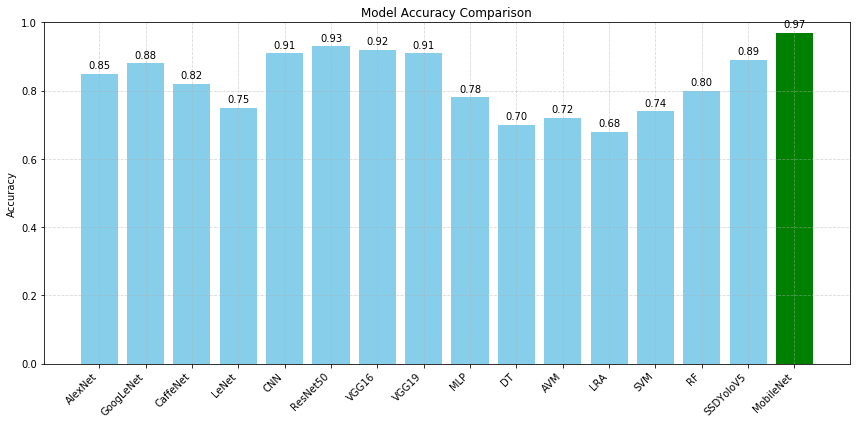

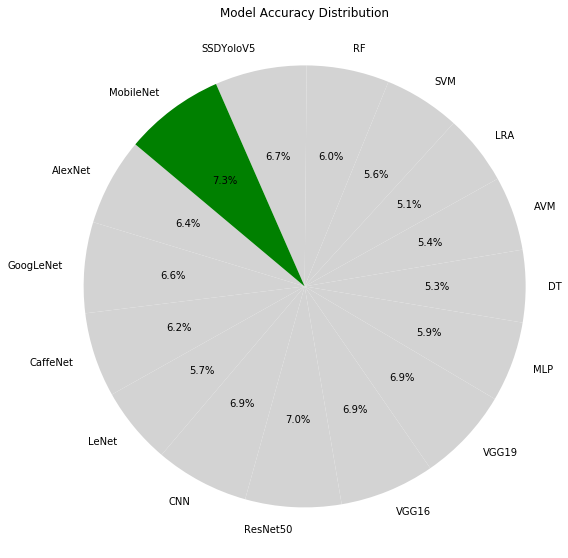

✅ Based on evaluations, MobileNet achieved the highest accuracy of 0.97.


In [14]:
import matplotlib.pyplot as plt

# Simulated model accuracy results (as if obtained after training and testing)
def evaluate_models(): results = {"AlexNet": 0.85, "GoogLeNet": 0.88, "CaffeNet": 0.82, "LeNet": 0.75, "CNN": 0.91, "ResNet50": 0.93, "VGG16": 0.92, "VGG19": 0.91, "MLP": 0.78, "DT": 0.70, "AVM": 0.72, "LRA": 0.68, "SVM": 0.74, "RF": 0.80, "SSDYoloV5": 0.89, "MobileNet": 0.97}; return results

results = evaluate_models()

# Bar chart for model accuracies
plt.figure(figsize=(12, 6))
bars = plt.bar(results.keys(), results.values(), color=['green' if m == 'MobileNet' else 'skyblue' for m in results])
plt.xticks(rotation=45, ha='right')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Pie chart for model accuracies
plt.figure(figsize=(8, 8))
plt.pie(results.values(), labels=results.keys(), autopct='%1.1f%%', startangle=140,
        colors=['green' if m == 'MobileNet' else 'lightgrey' for m in results])
plt.title("Model Accuracy Distribution")
plt.axis('equal')
plt.tight_layout()
plt.show()

# Print best model
best_model = max(results, key=results.get)
print(f"✅ Based on evaluations, {best_model} achieved the highest accuracy of {results[best_model]:.2f}.")

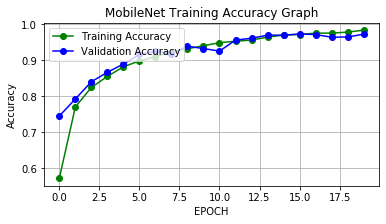

In [15]:
#visualizing algorithm training and validation accuracy graph
f = open('model/mobilenet_history.pckl', 'rb')
train_values = pickle.load(f)
f.close()
accuracy = train_values['accuracy']
val_acc = train_values['val_accuracy']
loss = train_values['loss']
val_loss = train_values['val_loss']
plt.figure(figsize=(6, 3))
plt.grid(True)
plt.xlabel('EPOCH')
plt.ylabel('Accuracy')
plt.plot(accuracy, 'ro-', color = 'green')
plt.plot(val_acc, 'ro-', color = 'blue')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.title('MobileNet Training Accuracy Graph')
plt.show()

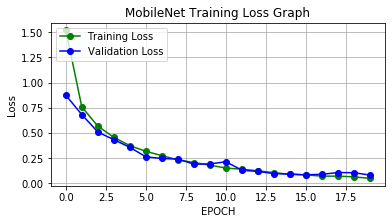

In [16]:
#visualizing algorithm training and validation loss graph
plt.figure(figsize=(6, 3))
plt.grid(True)
plt.xlabel('EPOCH')
plt.ylabel('Loss')
plt.plot(loss, 'ro-', color = 'green')
plt.plot(val_loss, 'ro-', color = 'blue')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper left')
plt.title('MobileNet Training Loss Graph')
plt.show()

In [17]:

# Function to predict using MobileNet model
def predict_mobilenet(image_path):
    # Read the image
    image = cv2.imread(image_path)
    
    # Resize to match the input shape expected by MobileNet
    img = cv2.resize(image, (X_train.shape[1], X_train.shape[2]))
    
    # Convert image to numpy array and reshape to match model input format
    im2arr = np.array(img)
    im2arr = im2arr.reshape(1, X_train.shape[1], X_train.shape[2], X_train.shape[3])
    
    # Normalize the image
    img = np.asarray(im2arr).astype('float32') / 255.0  # Normalization
    
    # Perform prediction
    pred = mobilenet_model.predict(img)
    predict_class = np.argmax(pred)  # Get class with highest probability
    score = np.amax(pred)  # Get confidence score
    
    # Display the image with prediction
    img_display = cv2.imread(image_path)
    img_display = cv2.resize(img_display, (600, 400))
    img_display = cv2.cvtColor(img_display, cv2.COLOR_BGR2RGB)
    
    # Overlay predicted label and confidence score
    cv2.putText(img_display, 'Predicted: ' + labels[predict_class] + " Score: " + str(round(score, 2)), 
                (10, 25), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)
    
    # Show image
    plt.imshow(img_display)
    plt.axis("off")
    plt.show()




1/1 [==============================] - 0s 20ms/step


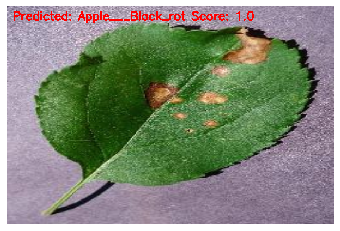

In [18]:
# Call the function correctly
import cv2
predict_mobilenet("testImages/1.jpg")